<a href="https://colab.research.google.com/github/Imran1hp/Food-Recognition-Deep-Learning-model/blob/main/Food_recognition_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import zipfile
from pathlib import Path


#making the data folder
folder_name = 'pizza_stack_shushi'

data_path = Path("data/")
image_path = data_path / folder_name

if image_path.is_dir():
  print("File already exist skipping download......")

else:
  print(f'{image_path} downloading ......... ')
  image_path.mkdir(parents = True , exist_ok = True )


  #Downloading Data
  with open(data_path / "pizza_stack_shushi.zip" , 'wb') as f:
    url = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/data/pizza_steak_sushi.zip')
    print("Downloading the data............." )
    f.write(url.content)

  #Unzip t he file
  with zipfile.ZipFile( data_path / "pizza_stack_shushi.zip" , 'r' ) as zip_ref:
    print('Unziping the data ')
    zip_ref.extractall(image_path)




data/pizza_stack_shushi downloading ......... 
Unziping the data 


In [4]:
import os



def walk_through_data(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [5]:
image_path

PosixPath('data/pizza_stack_shushi')

In [6]:
walk_through_data(image_path)

There are 2 directories and 0 images in data/pizza_stack_shushi 
There are 3 directories and 0 images in data/pizza_stack_shushi/train 
There are 0 directories and 75 images in data/pizza_stack_shushi/train/steak 
There are 0 directories and 72 images in data/pizza_stack_shushi/train/sushi 
There are 0 directories and 78 images in data/pizza_stack_shushi/train/pizza 
There are 3 directories and 0 images in data/pizza_stack_shushi/test 
There are 0 directories and 19 images in data/pizza_stack_shushi/test/steak 
There are 0 directories and 31 images in data/pizza_stack_shushi/test/sushi 
There are 0 directories and 25 images in data/pizza_stack_shushi/test/pizza 


In [24]:

train_dir = image_path/ 'train'
test_dir =  image_path / 'test'
train_dir , test_dir


(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

Image path data/pizza_stack_shushi/test/sushi/3177743.jpg
Image Class: sushi
Image Height: 512
Image Width: 512


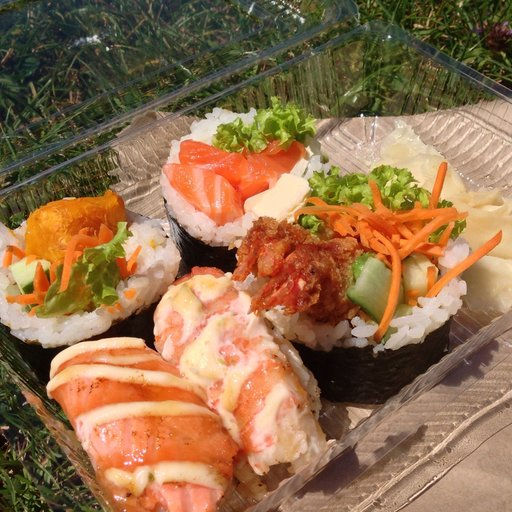

In [8]:
import random
from PIL import Image




img_path_list = list(image_path.glob('*/*/*.jpg'))

random_img_path = random.choice(img_path_list)

img_class = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Image path {random_img_path}")
print(f"Image Class: {img_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img


In [9]:
img_path_list

[PosixPath('data/pizza_stack_shushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2129685.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/443210.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/735441.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/922752.jpg'),


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

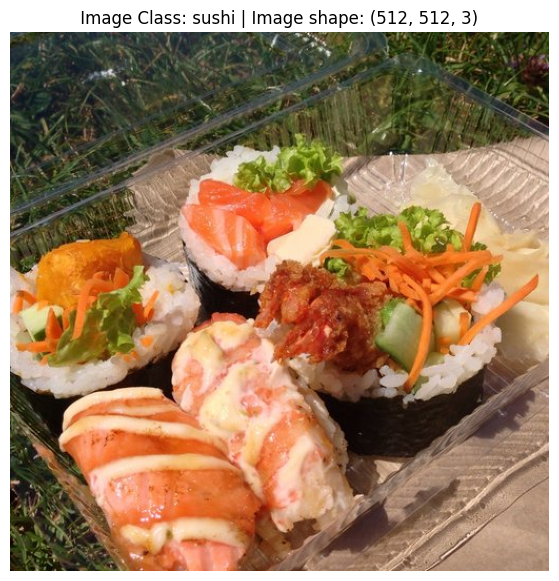

In [10]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.array(img)

plt.figure(figsize = ((10 ,7)))

plt.imshow(img_array)

plt.title(f" Image Class: {img_class} | Image shape: {img_array.shape} ")
plt.axis(False)

array([[[ 50,  72,  83],
        [ 40,  62,  73],
        [ 46,  66,  77],
        ...,
        [ 71,  89,  39],
        [ 35,  55,   2],
        [ 39,  60,   4]],

       [[ 39,  59,  68],
        [ 43,  63,  72],
        [ 54,  74,  83],
        ...,
        [ 73,  91,  41],
        [ 42,  62,   9],
        [ 44,  65,   9]],

       [[ 52,  71,  77],
        [ 53,  72,  78],
        [ 49,  68,  74],
        ...,
        [ 60,  78,  28],
        [ 39,  59,   6],
        [ 42,  63,   7]],

       ...,

       [[ 54,  37,  27],
        [ 49,  35,  22],
        [ 45,  32,  15],
        ...,
        [165, 133, 108],
        [162, 130, 105],
        [161, 129, 104]],

       [[ 28,   9,   2],
        [ 31,  15,   2],
        [ 38,  22,   6],
        ...,
        [168, 136, 111],
        [164, 132, 107],
        [163, 131, 106]],

       [[ 22,   3,   0],
        [ 24,   6,   0],
        [ 33,  17,   1],
        ...,
        [176, 144, 119],
        [173, 141, 116],
        [171, 139, 114]]], dtype=uint8)
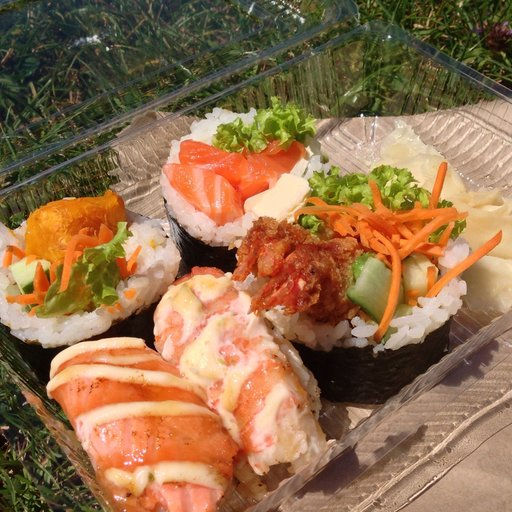

In [11]:
img_array

FOR UNDERSTANDING THE PIEXL DISTRIBUTION  OF 5 x 5

In [12]:
img_2_array = np.array([
 [(255, 0, 0),   (255, 0, 0),   (0, 0, 0),     (0, 0, 0),     (0, 0, 0)],
 [(255, 0, 0),   (255, 0, 0),   (0, 255, 0),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 0, 255),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 255, 0),   (255, 0, 0),   (255, 0, 0)],
])

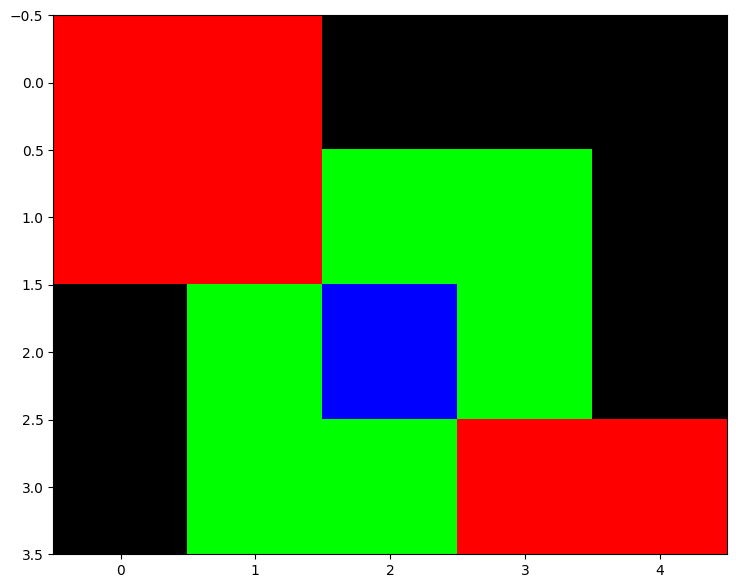

In [13]:
plt.figure (figsize =(10,7))

plt.imshow(img_2_array)

In [14]:
img_2_array.shape # --> heigth , width , color channel

(4, 5, 3)

In [15]:
print(f"Height: {len(img_2_array) } | Width: {len(img_2_array[0])} | Color channel : {len(img_2_array[0][0])}")

Height: 4 | Width: 5 | Color channel : 3


## Transforming Our Data into Tensor

In [16]:
from torch.utils.data import DataLoader
from torchvision import transforms , datasets
from torch import nn

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(64 , 64 )),
    transforms.RandomHorizontalFlip(p=0.5)
])

In [17]:
image = data_transform(img)
image.shape

torch.Size([3, 64, 64])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

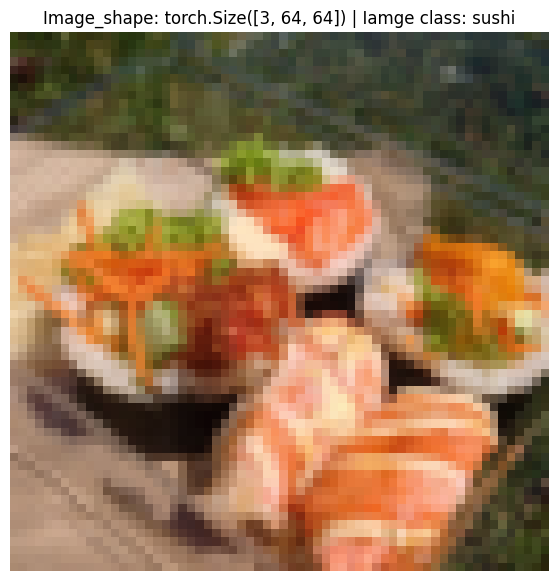

In [18]:
plt.figure(figsize =(10,7))

# Permute the dimensions of the tensor from (C, H, W) to (H, W, C) for imshow

plt.imshow(image.permute(1, 2, 0).numpy())
plt.title(f"Image_shape: {image.shape} | Iamge class: {img_class}")
plt.axis(False)

##Loading Image Data using image folder

In [29]:
train_dir , test_dir

(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

In [28]:
from torchvision.datasets import ImageFolder
train_loader = ImageFolder( root = train_dir , transform = data_transform , target_transform = None)
test_loader =  ImageFolder( root = test_dir , transform = data_transform , target_transform = None )